In [119]:
import pandas as pd
import numpy as np
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt


In [120]:
df=pd.read_csv("bfi.csv")

In [121]:
df

,rownames,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,67551,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,...,NaN,1.0,6.0,1,6.0,6.0,1.0,1,3.0,19
2796,67552,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,...,3.0,3.0,6.0,3,5.0,4.0,2.0,1,4.0,27
2797,67556,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,...,3.0,1.0,5.0,1,6.0,4.0,3.0,2,4.0,29
2798,67559,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,...,4.0,1.0,5.0,2,5.0,5.0,1.0,1,4.0,31


In [122]:
# The unnecessary column is rownames

In [123]:
df.drop(["rownames","gender","education","age"],axis=1,inplace=True)

In [124]:
df

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,...,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,...,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [125]:
df.isnull().sum()

A1    16
A2    27
A3    26
A4    19
A5    16
C1    21
C2    24
C3    20
C4    26
C5    16
E1    23
E2    16
E3    25
E4     9
E5    21
N1    22
N2    21
N3    11
N4    36
N5    29
O1    22
O2     0
O3    28
O4    14
O5    20
dtype: int64

In [126]:
# Now seeing the type of columns

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2784 non-null   float64
 1   A2      2773 non-null   float64
 2   A3      2774 non-null   float64
 3   A4      2781 non-null   float64
 4   A5      2784 non-null   float64
 5   C1      2779 non-null   float64
 6   C2      2776 non-null   float64
 7   C3      2780 non-null   float64
 8   C4      2774 non-null   float64
 9   C5      2784 non-null   float64
 10  E1      2777 non-null   float64
 11  E2      2784 non-null   float64
 12  E3      2775 non-null   float64
 13  E4      2791 non-null   float64
 14  E5      2779 non-null   float64
 15  N1      2778 non-null   float64
 16  N2      2779 non-null   float64
 17  N3      2789 non-null   float64
 18  N4      2764 non-null   float64
 19  N5      2771 non-null   float64
 20  O1      2778 non-null   float64
 21  O2      2800 non-null   int64  
 22  

In [128]:
df.describe()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
count,2784.000000,2773.00000,2774.000000,2781.000000,2784.000000,2779.000000,2776.000000,2780.000000,2774.000000,2784.000000,...,2778.000000,2779.000000,2789.000000,2764.000000,2771.000000,2778.000000,2800.000000,2772.000000,2786.000000,2780.000000
mean,2.413434,4.80238,4.603821,4.699748,4.560345,4.502339,4.369957,4.303957,2.553353,3.296695,...,2.929086,3.507737,3.216565,3.185601,2.969686,4.816055,2.713214,4.438312,4.892319,2.489568
std,1.407737,1.17202,1.301834,1.479633,1.258512,1.241347,1.318347,1.288552,1.375118,1.628542,...,1.570917,1.525944,1.602902,1.569685,1.618647,1.129530,1.565152,1.220901,1.221250,1.327959
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.000000,4.000000,4.000000,1.000000
50%,2.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,5.000000,2.000000,5.000000,5.000000,2.000000
75%,3.000000,6.00000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,6.000000,4.000000,5.000000,6.000000,3.000000
max,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [129]:
df['A3'].median()

5.0

In [130]:
# Imputing the NULL values
for col in df.columns:
    median=df[col].median()
    df[col].fillna(median,inplace=True)


In [131]:
# Deleting NULL values

# df.dropna(inplace=True)

In [132]:
df

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,...,1.0,1.0,1.0,3.0,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,...,3.0,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [133]:
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value


(19883.899806053043, 0.0)

Now check for second type of Kaiser-Meyer-Olkin (KMO) Test

It evaluates whether a set of data is suitable for factor analysis. It assesses the suitability of the entire model as well as each observed variable. The KMO calculates the variance percentage of each observed variable. Factor analysis is better suited with a lower proportion. The range of KMO values is 0 to 1. A KMO value of less than 0.6 is regarded as insufficient.



In [134]:

answers,model_kmo=calculate_kmo(df)

In [135]:
# Result 

model_kmo

0.8456207508182776

Now, we have to choose the number of factors

In [136]:
analyzer = FactorAnalyzer()
analyzer.fit(df, 30)
eigev_values, eigen_vectors = analyzer.get_eigenvalues()
eigev_values

array([5.01049132, 2.732287  , 2.09747422, 1.82483588, 1.5303911 ,
       1.11336759, 0.84784354, 0.81362797, 0.73645257, 0.6969706 ,
       0.68458406, 0.66106089, 0.63055046, 0.60125021, 0.56691681,
       0.54338661, 0.52542831, 0.50322888, 0.49354437, 0.45907435,
       0.43621187, 0.41269427, 0.41050026, 0.38828566, 0.27954119])

 Eigenvalues are both greater than 1, suggesting that the two factors are being retained.


Only 25 main eigen values came since they are only important

In [137]:
values_greater_than_six=0
for val in eigev_values:
    if val >1:
        values_greater_than_six+=1
print(values_greater_than_six)

6


Only 6 values are geater than 1, so we only have to craete graph of it


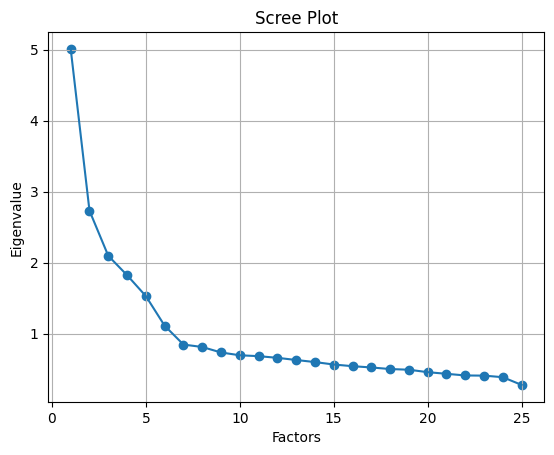

In [138]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),eigev_values)
plt.plot(range(1,df.shape[1]+1),eigev_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Every factor and its eigenvalues are represented by a straight line using the scree plot method. The number of factors is determined by the number of eigenvalues greater than one.

As you can see, eigenvalues are greater than one only for 6-factors. This implies that we have to select just six factors, or unobserved variables.



Now factor analysis|

In [139]:
analyzer = FactorAnalyzer()
analyzer.fit(df,6)

FactorAnalyzer(rotation_kwargs={})

In [140]:
result=analyzer.loadings_
result

array([[-0.2149779 ,  0.09009219,  0.02885655],
       [ 0.52761735,  0.07485997,  0.03447984],
       [ 0.64766767,  0.05533798, -0.0314702 ],
       [ 0.36573366, -0.03814777,  0.07187637],
       [ 0.65798601, -0.05988974, -0.05449128],
       [-0.04395746,  0.0681394 ,  0.59835854],
       [-0.02596794,  0.14216107,  0.64166793],
       [-0.01977529,  0.01067056,  0.49540148],
       [ 0.08169486,  0.20150105, -0.63220679],
       [-0.03373877,  0.26198264, -0.47119083],
       [-0.56301101,  0.01185533,  0.15014549],
       [-0.59344875,  0.20601484,  0.05122721],
       [ 0.63951045,  0.09494866,  0.02561939],
       [ 0.71614881, -0.07243765, -0.129585  ],
       [ 0.43613849,  0.09663554,  0.26410428],
       [ 0.02597825,  0.72805089, -0.08786582],
       [ 0.00401229,  0.73182181, -0.04176993],
       [ 0.04262251,  0.74640134, -0.07021423],
       [-0.17986553,  0.57374165, -0.07821789],
       [ 0.00288064,  0.51290017, -0.09539014],
       [ 0.22007616,  0.0866332 ,  0.257

In [141]:
result.shape

(25, 3)

Only 3 factors came since it is most important

In [142]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

See which factors are important for which column 

In [143]:
cols=df.columns
factor1=result[:,0]
factor2=result[:,1]
factor3=result[:,2]

for col,val in zip(cols,factor1):
    print(col,val)



A1 -0.21497790377217876
A2 0.5276173544019636
A3 0.6476676728176238
A4 0.3657336620535925
A5 0.6579860105388327
C1 -0.04395745823540502
C2 -0.025967939658570936
C3 -0.019775290751105283
C4 0.08169485784313318
C5 -0.03373876923787047
E1 -0.5630110083968307
E2 -0.5934487543409209
E3 0.6395104494225741
E4 0.7161488124434605
E5 0.43613848840821984
N1 0.025978245804275765
N2 0.004012289643310149
N3 0.04262251119966835
N4 -0.17986552614080384
N5 0.002880643698087579
O1 0.22007616441642802
O2 0.07903799943371609
O3 0.3363916129216834
O4 -0.013758924615504533
O5 -0.01696894659353448


So for first factor E4,A5,A3 are highest so higly likely associated to it

In [144]:
for col,val in zip(cols,factor2):
    print(col,val)

A1 0.0900921884745602
A2 0.07485996676218636
A3 0.05533798385202871
A4 -0.03814777365183597
A5 -0.05988974102386101
C1 0.06813939959443
C2 0.14216107255393
C3 0.010670563290604323
C4 0.20150105012189035
C5 0.2619826433351682
E1 0.011855325898306597
E2 0.20601483827383676
E3 0.09494865977689598
E4 -0.0724376539759262
E5 0.09663554207462383
N1 0.7280508923048744
N2 0.7318218066633307
N3 0.7464013400512834
N4 0.5737416515067068
N5 0.5129001735037779
O1 0.08663320256762243
O2 0.11729861904007104
O3 0.11513029439108036
O4 0.2719939539178506
O5 0.015203550560790745


So for second factor N3,N2,N1 are highest so higly likely associated to it

In [145]:
for col,val in zip(cols,factor3):
    print(col,val)

A1 0.028856550294102966
A2 0.034479836997300305
A3 -0.031470203751443535
A4 0.0718763650902809
A5 -0.05449127638282163
C1 0.5983585445415777
C2 0.6416679308136415
C3 0.495401475071098
C4 -0.632206789774527
C5 -0.47119083498675823
E1 0.15014549487612713
E2 0.05122720808996606
E3 0.025619394390621112
E4 -0.12958500302428488
E5 0.2641042797803945
N1 -0.08786582311162058
N2 -0.04176993229184148
N3 -0.07021422576976423
N4 -0.07821789214616336
N5 -0.09539014070540529
O1 0.25714296214996235
O2 -0.2925654516600953
O3 0.227983523332482
O4 0.14780557290801244
O5 -0.2628416349253106


So for third factor C2,C4,C1 are highest so higly likely associated to it

Factor analysis is a method used to analyze large datasets, identifying interrelated associations and reducing observed variables into unobserved ones. It aids market researchers in understanding hidden relationships between consumer preferences and cultural influences, improving questionnaires for future surveys.

In [156]:
analyzer.get_factor_variance()

(array([3.30599268, 2.54592609, 2.0846528 ]),
 array([0.13223971, 0.10183704, 0.08338611]),
 array([0.13223971, 0.23407675, 0.31746286]))

To get the scores on dummy data

In [154]:
analyzer.transform([np.random.randint(6, size=25)])

array([[-1.50762635, -0.05347001, -1.56338254]])

The factor scores suggest that the new individual is high in both factors. Based on this information, we might predict that the new individual is likely to be successful in a variety of settings, such as social situations, work, and school.

